# Homework 3
## ECE204 Data Science & Engineering

---
## Question 1
> A number N is _divisible_ by P if P divides N evenly. For example, 15 is divisible by 1, 3, 5, and 15. The numbers [1,3,5,15] are called the "divisors" of 15. Your task is to create a function that returns the sum of all the divisors of a number. For example, if you call the function "F", you should find that F(15) returns 24.
> We can figure out if N is divisible by P by using Python's "modulo" function. The syntax for this is:
> ```python
> N % P == 0    # this returns True if P divides N
>```
> <br>For more information about the modulo (%) function in Python, see [this link](https://www.pythoncentral.io/using-python-to-check-for-odd-or-even-numbers/).
>
> Write the function "F" and test it to make sure that `F(15) == 24`. Call the function with the argument given to you in Canvas.

In [1]:
def F(n):
    list_sum = []
    for i in range(1, n+1):
        if n % i == 0:
            list_sum.append(i)
    sum_div = sum(list_sum)
    return sum_div

F = F(16743)
F

22328

---
## Question 2
> List comprehensions we saw in class looked like this:
> ```python
> [ (do this) for (item in collection) ]
> ```
> <br>But what if we only want to select the items that satisfy an additional condition as well? We can use the syntax:
> ```python
> [ (do this) for (item in collection) if (true/false condition) ]
> ```
> <br>**Use this technique to find the sum of numbers divisible by 7 or 11 and report this result. Be sure to use the range of vlaues (inclusive) given to you in Canvas**. You may want to start with a smaller number first to make sure your list comprehension is doing the right thing!
>
> `NOTE:` If a number is divisible by both 7 and 11, add it only **once**.
>
> Hint: The answer for numbers 1 to 30 would be: 7 + 11 + 14 + 21 + 22 + 28 = 103

In [2]:
sum(set([i for i in range(154, 10119) if ((i % 7 == 0) or (i % 11 == 0))]))

11295002

---
## Question 3
> The square of the sum of the first ten natural numbers is
>
> $$(1 + 2 + ... + 10)^2 = 55^2 = 3025$$
> 
>   The sum of the squares of the first ten natural numbers is
>
> $$1^2 + 2^2 + ... + 10^2 = 385$$
>
> Hence the difference between the square of the sum of first ten natural numbers and the sum of the squares is 3025 − 385 = 2640.
>
> **Find the difference between the square of the sum of the first X natural numbers and the sum of the squares. Note that X is the value given to you in Canvas**


In [3]:
diff = sum([i for i in range(1, 151+1)]) ** 2 - sum([i**2 for i in range(1, 151+1)])
diff

130539500

---
## Question 4
> Out of all the points in the list of `candidates`, find the one that is the furthest (in Euclidean distance) from the `given` point? Note: the `given` point is provided for you in Canvas. 
> What is this furthest / highest distance? **Report this furthest distance rounded to two numbers after the decimal.**
>
> `Hint: np.linalg.norm( )`

In [4]:
candidates = [
    (0.0, 1.0),
    (0.32, 0.95),
    (0.61, 0.79),
    (0.84, 0.55),
    (0.97, 0.25),
    (1.0, -0.08),
    (0.92, -0.4),
    (0.74, -0.68),
    (0.48, -0.88),
    (0.16, -0.99),
    (-0.16, -0.99),
    (-0.48, -0.88),
    (-0.74, -0.68),
    (-0.92, -0.4),
    (-1.0, -0.08),
    (-0.97, 0.25),
    (-0.84, 0.55),
    (-0.61, 0.79),
    (-0.32, 0.95),
    (-0.0, 1.0)
]

In [5]:
import numpy as np 

given = [1, 3]

def Euclidean_distance(candidates):
    return max([np.linalg.norm(np.array(given) - np.array(i)) for i in candidates])

round(Euclidean_distance(candidates), 2)

4.16

---
## Question 5
> `celsius.csv` contains a list of temperatures in Celsius. **What is the mean Fahrenheit temperature? (Report your answer rounded to two numbers after the decimal)**
>
> The Celsuis to Fahrenheit conversion is given by `fahrenheit = 1.8 * celsius + 32`.

In [6]:
import pandas as pd 

s = pd.read_csv("celsius.csv")
s.head()

,temps
0,54.88
1,71.52
2,60.28
3,54.49
4,42.37


In [7]:
fahrenheit = [1.8 * float(i) + 32 for i in s['temps']]
mean_f = sum(fahrenheit) / len(fahrenheit)
round(mean_f, 2)

121.36

---
## Question 6
> **What is the fastest method to convert from Celsius to Fahrenheit?**
>
> * a list comphrension used to make a list of all the converted temperatures
> * using `Series.apply` to convert each element of the Series
> * directly evaluating (`1.8*T + 32`), where `T` is the Series of temperatures
>
> `NOTE:` Use `%timeit` to do your timing analysis. Use the `celsius.csv` data file from the previous problem.

In [8]:
def list_comp(T):
    return [1.8 * float(i) + 32 for i in T]

def series_apply(T):
    return T.apply(lambda x: 1.8 * x + 32)

def direct(T):
    return 1.8 * T + 32

%timeit -n 500 list_comp(s['temps'])
%timeit -n 500 series_apply(s['temps'])
%timeit -n 500 direct(s['temps'])

1.08 ms ± 32.6 μs per loop (mean ± std. dev. of 7 runs, 500 loops each)
1.66 ms ± 42.8 μs per loop (mean ± std. dev. of 7 runs, 500 loops each)
76 μs ± 13.9 μs per loop (mean ± std. dev. of 7 runs, 500 loops each)


---
## Question 7
> **What is one of the centers in `features.csv` when using Scikit-Learn's KMeans?** They are listed as `[feature0, feature1]`, and `KMeans` should be used as `KMeans(n_clusters=4, random_state=42)`. These numbers are rounded -- pick the closest one in the list.
>
> Hint: read the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
>
> * [170  67]
> * [170  88]
> * [201  88]
> * [201  67]
> * [-131  748]
> * [-131  728]
> * [-161  728]
> * [-161  748]

In [9]:
df = pd.read_csv("features.csv")
df.head()

,feature0,feature1
0,124.30,172.35
1,-135.85,755.16
2,109.56,483.43
3,-109.52,782.18
4,153.27,156.09


array([[ 201.,   88.],
       [-133.,  778.],
       [-157.,  286.],
       [  96.,  438.]])

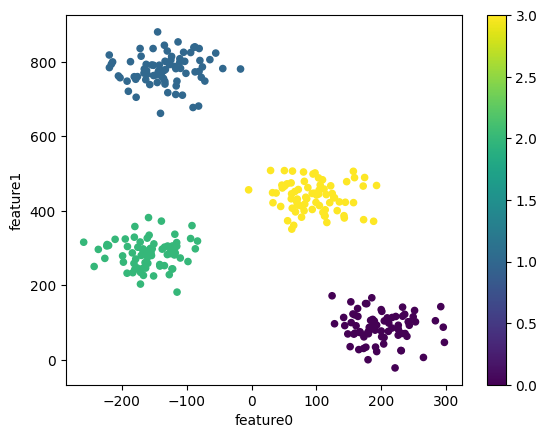

In [10]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4, random_state=42)
fit_predict = km.fit_predict(df)

centers = km.cluster_centers_
df.plot.scatter(x='feature0', y='feature1', c=fit_predict, cmap='viridis')

np.round(centers)

---
## Question 8
> **Using the same setup as before, which cluster center is the point `[-100, 850]` nearest to?** <br>
>
> `NOTE:` **choose a valid cluster center**
>
> * [-157,  286]
> * [-91,  743]
> * [ 201,   87]
> * [  -133,  778]

In [11]:
given = [-100, 850]

cluster_centers =[[-157, 286], [-91, 743], [201, 87], [-133,  778]]

def Euclidean_dis_near(cluster_centers):
    return min([[np.linalg.norm(np.array(given) - np.array(i)), i] for i in cluster_centers])

Euclidean_dis_near(cluster_centers)

[79.20227269466452, [-133, 778]]

---